In [1]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_histogram(image_path):
    # Open the image
    image = Image.open(image_path)
    
    # Convert the image to grayscale
    image_gray = image.convert("L")
    
    # Compute the histogram
    histogram = image_gray.histogram()
    
    # Plot the histogram
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(256), histogram, color='gray', width=1)
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.show()

                                                IMAGE A

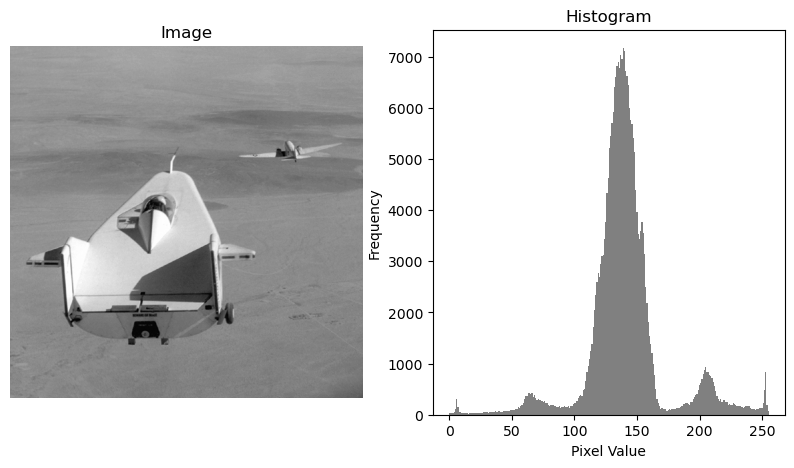

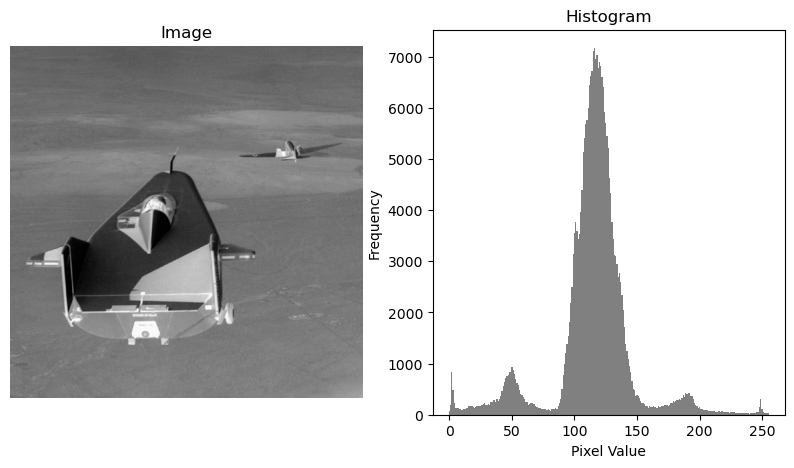

In [75]:
# Test the function
image_path = "images (1)/images/A_original.png"  # Specify the filepath of your own image
plot_histogram(image_path)
plot_histogram("images (1)/images/A_modified.png")


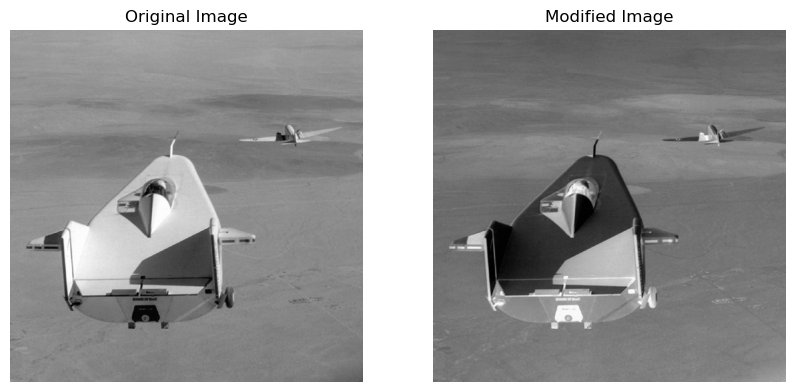

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

def negative_grayscale_image(image_path):
    # Open the image
    image = Image.open(image_path)
    
    # Get the dimensions of the image
    width, height = image.size
    
    # Create a copy of the original image
    modified_image = image.copy()
    
    # Iterate over each pixel and compute its negative
    for x in range(width):
        for y in range(height):
            # Get the pixel value (since it's grayscale, there's only one color channel)
            pixel_value = modified_image.getpixel((x, y))
            
            # Compute the negative value
            new_pixel_value = 255 - pixel_value
            
            # Set the new pixel value
            modified_image.putpixel((x, y), new_pixel_value)
    
    # Create a new figure
    plt.figure(figsize=(10, 5))
    
    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot the modified image
    plt.subplot(1, 2, 2)
    plt.imshow(modified_image, cmap='gray')
    plt.title('Modified Image')
    plt.axis('off')
    
    # Show the images
    plt.show()

# Specify the filepath of the grayscale image you want to take the negative of
image_path = "images (1)/images/A_original.png" # Specify the filepath of your own image
negative_grayscale_image(image_path)


                                                     IMAGE B

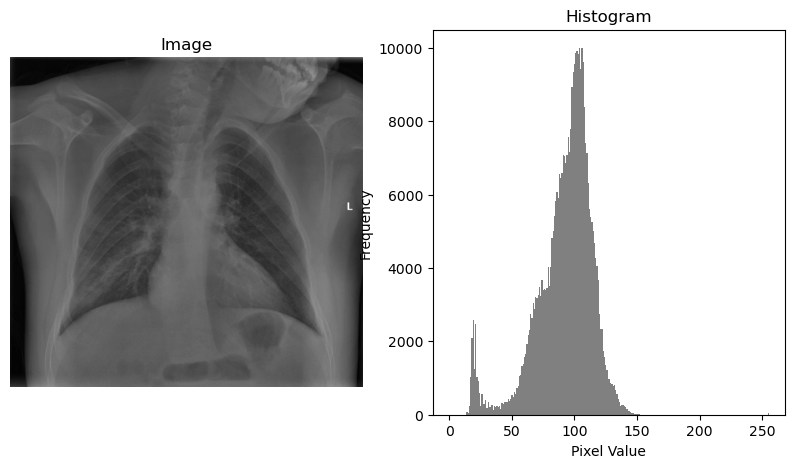

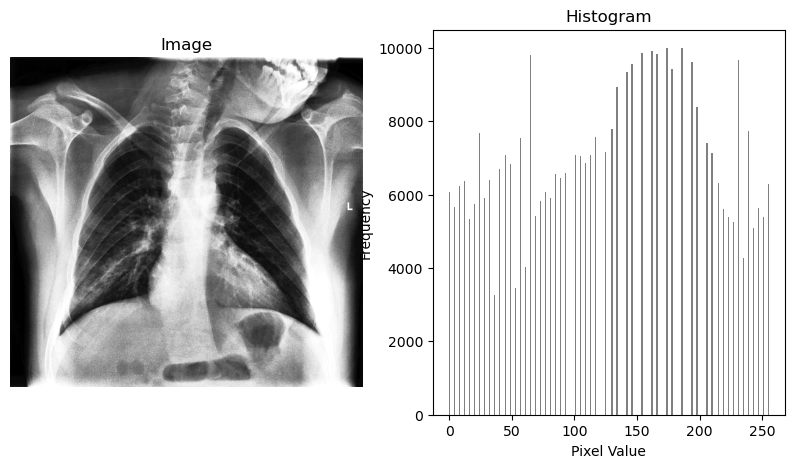

In [76]:
# Test the function
image_path = "images (1)/images/B_original.png"  # Specify the filepath of your own image
plot_histogram(image_path)
plot_histogram("images (1)/images/B_modified.png")

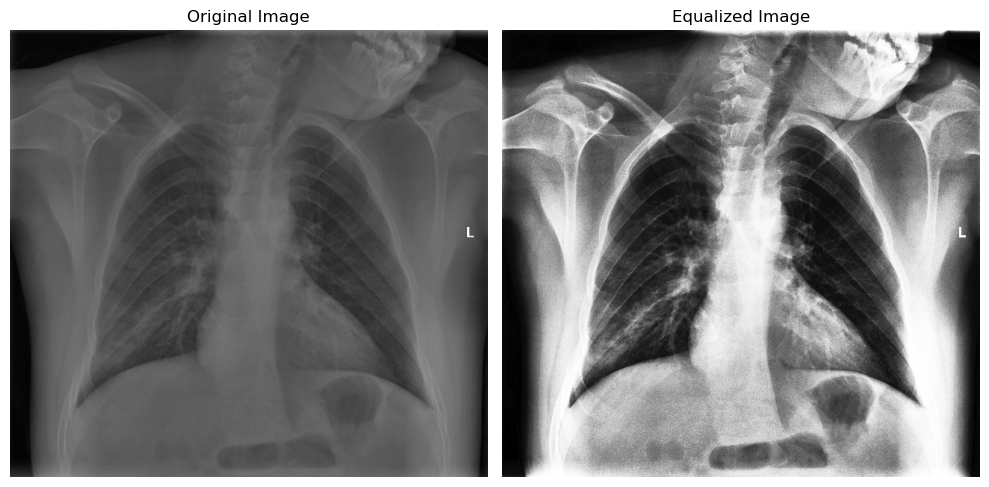

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def histogram_equalization(image_path):
    # Open the image
    image = Image.open(image_path)
    
    # Convert the image to grayscale if it's not already in grayscale
    if image.mode != "L":
        image = image.convert("L")
    
    # Compute the histogram
    histogram, bins = np.histogram(np.array(image).flatten(), bins=256, range=(0, 256))
    
    # Compute the cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = cdf / float(cdf.max())
    
    # Compute the histogram equalization transformation
    equalized_values = np.uint8(255 * cdf_normalized)
    
    # Apply the equalization transformation to each pixel in the image
    equalized_image = equalized_values[image]
    
    # Show original and equalized images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Test the function
image_path = "images (1)/images/B_original.png"  # Specify the filepath of your own image
histogram_equalization(image_path)


                                     IMAGE C

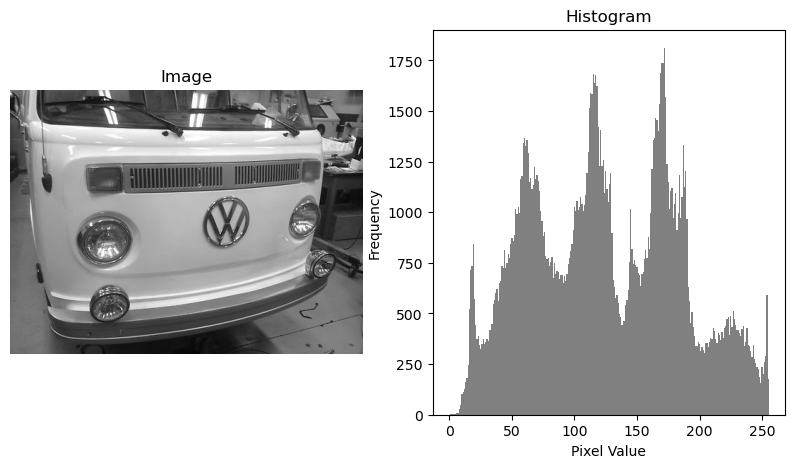

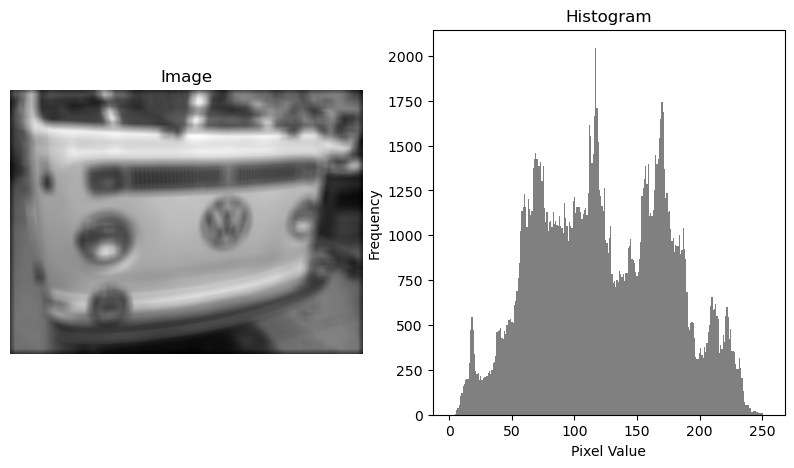

In [77]:
# Test the function
image_path = "images (1)/images/C_original.png"  # Specify the filepath of your own image
plot_histogram(image_path)
plot_histogram("images (1)/images/C_modified.png")

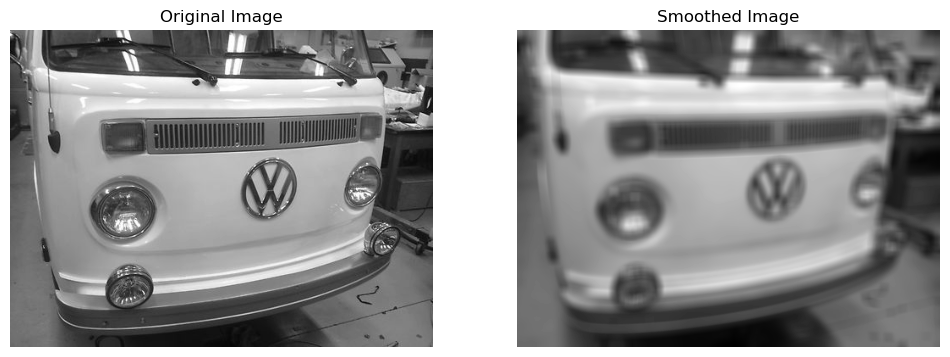

In [36]:
import numpy as np
from PIL import Image

def apply_smoothing_filter(image_path, filter_size):
    # Open the image
    image = Image.open(image_path)
    
    # Convert the image to grayscale
    image_gray = image.convert("L")
    
    # Convert the image to a NumPy array
    image_array = np.array(image_gray)
    
    # Get the dimensions of the original image
    height, width = image_array.shape
    
    # Initialize a new array for the smoothed image
    smoothed_image_array = np.zeros((height, width), dtype=np.uint8)
    
    # Iterate over each pixel in the image
    for i in range(height):
        for j in range(width):
            # Define the boundaries of the filter window
            top = max(0, i - filter_size // 2)
            bottom = min(height, i + filter_size // 2 + 1)
            left = max(0, j - filter_size // 2)
            right = min(width, j + filter_size // 2 + 1)
            
            # Extract the region of interest (ROI)
            roi = image_array[top:bottom, left:right]
            
            # Calculate the average pixel value in the ROI
            average_value = np.mean(roi)
            
            # Set the pixel value in the smoothed image
            smoothed_image_array[i, j] = int(average_value)
    
    # Convert the smoothed array back to an image
    smoothed_image = Image.fromarray(smoothed_image_array)
    
    # Show the original and smoothed images side by side
    _, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image_gray, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(smoothed_image, cmap='gray')
    axes[1].set_title('Smoothed Image')
    axes[1].axis('off')
    plt.show()

# Specify the filepath of the image you want to apply smoothing filter to
image_path = "images (1)/images/C_original.png"  # Specify the filepath of your own image
filter_size = 10  # Specify the size of the filter window
apply_smoothing_filter(image_path, filter_size)


                                     IMAGE D

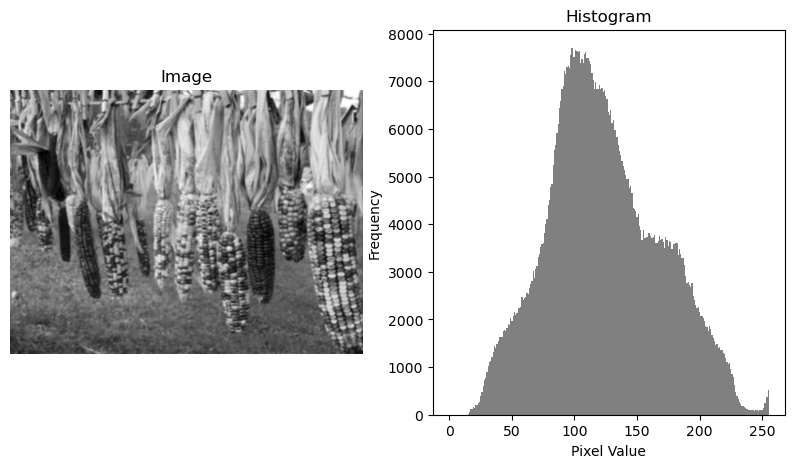

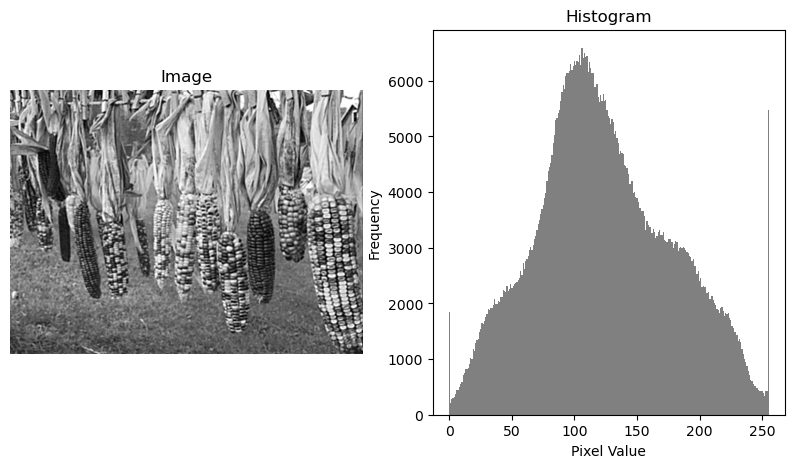

In [78]:
# Test the function
image_path = "images (1)/images/D_original.png"  # Specify the filepath of your own image
plot_histogram(image_path)
plot_histogram("images (1)/images/D_modified.png")

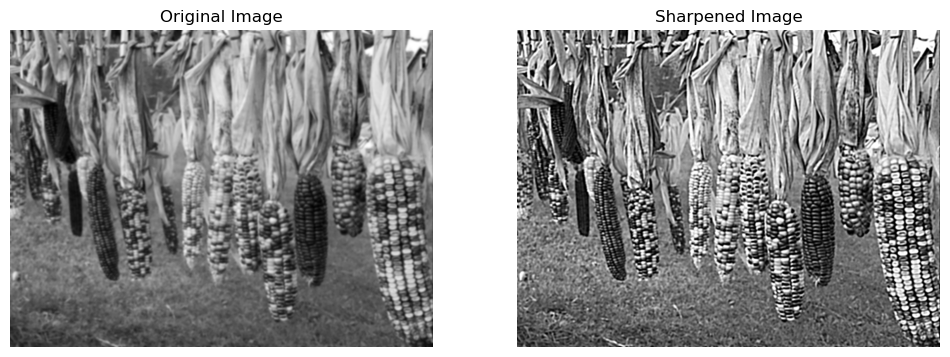

In [45]:
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter

def apply_unsharp_masking(image_path, sigma=1.0, strength=1.5):
    # Open the image
    image = Image.open(image_path)
    
    # Convert the image to grayscale
    image_gray = image.convert("L")
    
    # Convert the image to a NumPy array
    image_array = np.array(image_gray, dtype=float)  # dtype=float kullanarak float tipinde bir array oluşturuyoruz.
    
    # Apply Gaussian blur to the image array
    blurred_image_array = gaussian_filter(image_array, sigma=sigma)
    
    # Calculate the difference between the original and blurred images
    mask_array = image_array - blurred_image_array
    
    # Adjust the mask by the strength parameter
    sharpened_array = image_array + strength * mask_array
    
    # Normalize pixel values to be between 0 and 255
    sharpened_array = np.clip(sharpened_array, 0, 255)
    
    # Convert the sharpened array back to an image
    sharpened_image = Image.fromarray(sharpened_array.astype(np.uint8))
    
    # Show the original and sharpened images side by side
    _, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image_gray, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(sharpened_image, cmap='gray')
    axes[1].set_title('Sharpened Image')
    axes[1].axis('off')
    plt.show()

# Specify the filepath of the image you want to apply unsharp masking to
image_path = "images (1)/images/D_original.png"  # Specify the filepath of your own image
sigma = 2.0  # Specify the sigma value for Gaussian blur
strength = 5.0  # Specify the strength of the sharpening effect
apply_unsharp_masking(image_path, sigma, strength)


                                         IMAGE E

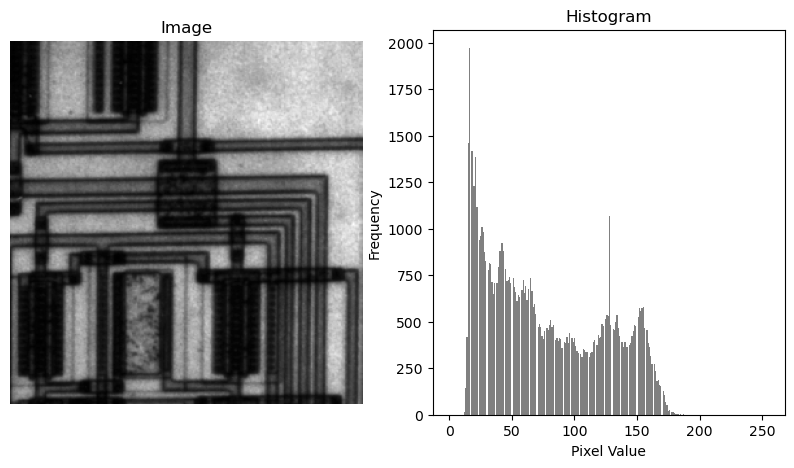

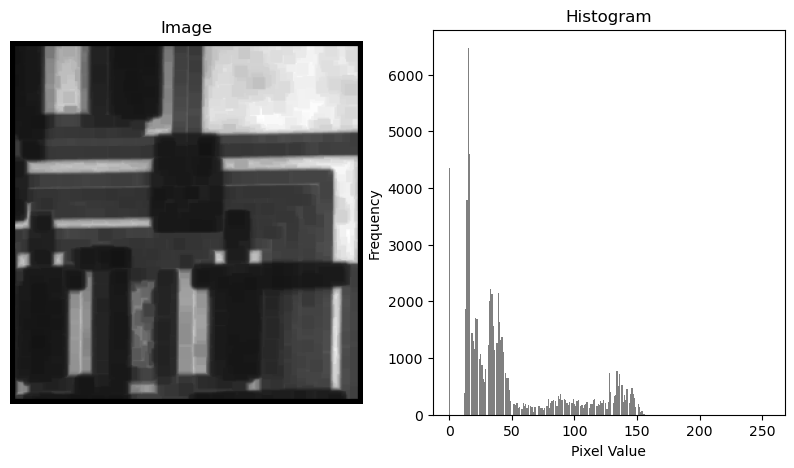

In [79]:
# Test the function
image_path = "images (1)/images/E_original.png"  # Specify the filepath of your own image
plot_histogram(image_path)
plot_histogram("images (1)/images/E_modified.png")

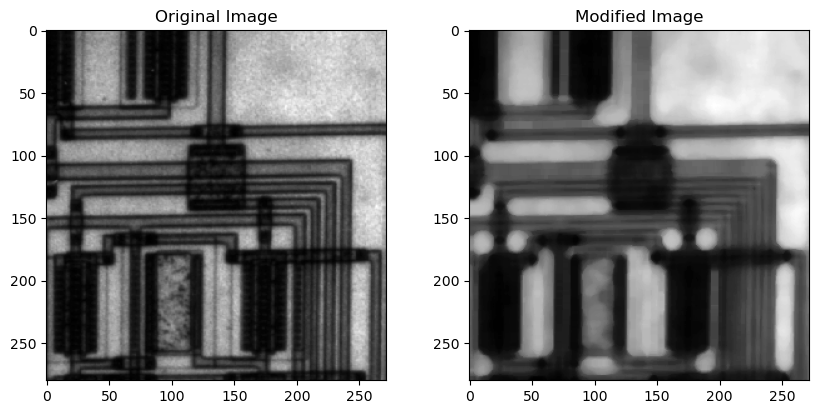

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Load original image
original_image = cv2.imread("images (1)/images/E_original.png", cv2.IMREAD_GRAYSCALE)

# Apply median filter
modified_image = median_filter(original_image, size=10)

# show images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(modified_image, cmap='gray')
plt.title('Modified Image')


plt.show()


                                  IMAGE F

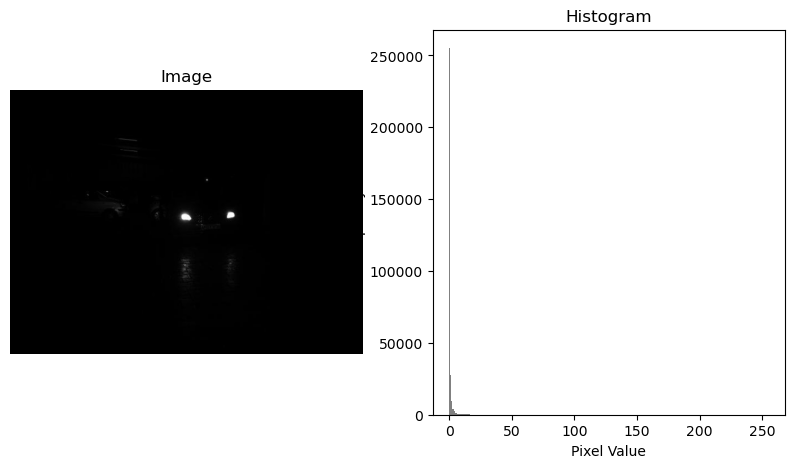

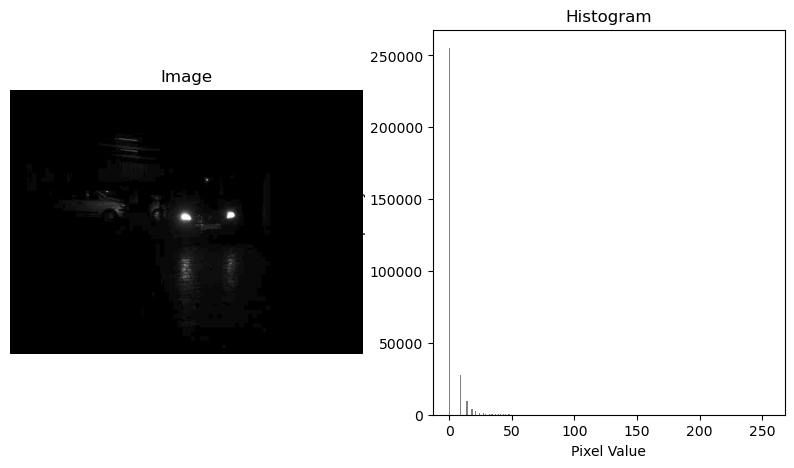

In [80]:
# Test the function
image_path = "images (1)/images/F_original.png"  # Specify the filepath of your own image
plot_histogram(image_path)
plot_histogram("images (1)/images/F_modified.png")

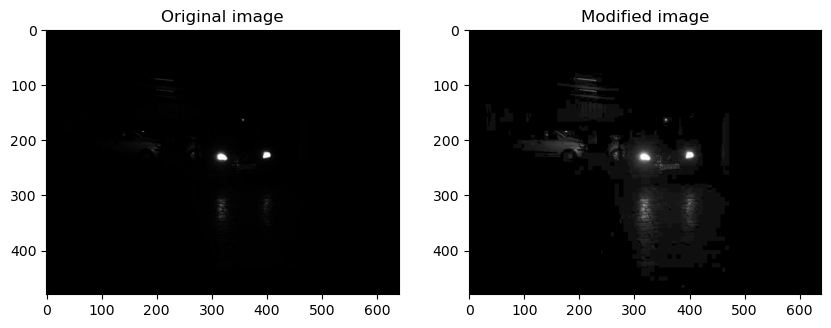

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_image = cv2.imread('images (1)\images\F_original.png', cv2.IMREAD_GRAYSCALE)

gamma = 0.5
reproduced_image = np.uint8(np.clip((original_image / 255.0) ** gamma * 255.0, 0, 255))

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original image')
plt.subplot(2, 2, 2), plt.imshow(cv2.cvtColor(reproduced_image, cv2.COLOR_BGR2RGB)), plt.title('Modified image')


plt.show()
